# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#import dependecies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import requests
import json
from citipy import citipy
from pprint import pprint
import os
import datetime as dt

#import API keys
from api_keys import g_key, weather_api_key

#set pandas display format to avoid scientific notation
pd.set_option('display.float_format', lambda x: '%.0f' % x)

outputFilePath = os.path.join("Output-Data")

## Generate Cities List

In [2]:
#(latitude, longitude)
#latitude (-90,90) degrees South --> North
#longitude (-180,180) degrees West --> East

#increase the size from 100 to much larger once done checking this step
lng = np.random.uniform(-180,180,1500)
lat = np.random.uniform(-90,90,1500)

citiesCreate_df = pd.DataFrame({"Latitude":lat,
                          "Longitude":lng})
citiesCreate_df

,Latitude,Longitude
0,-81,156
1,-36,-53
2,-60,53
3,-84,154
4,51,-156
...,...,...
1495,3,-161
1496,87,89
1497,7,95
1498,-12,100


In [3]:
#create empty lists
city = []
country = []

for i in range(0,len(citiesCreate_df['Latitude'])):
    #find nearest city
    city_current = citipy.nearest_city(citiesCreate_df.iloc[i]['Latitude'],citiesCreate_df.iloc[i]['Longitude']).city_name
    city.append(city_current)
    #find country of city
    country_current = citipy.nearest_city(citiesCreate_df.iloc[i]['Latitude'],citiesCreate_df.iloc[i]['Longitude']).country_code
    country.append(country_current)

#add them to the cities_df
citiesCreate_df['City'] = city
citiesCreate_df['Country'] = country
citiesCreate_df

,Latitude,Longitude,City,Country
0,-81,156,bluff,nz
1,-36,-53,rocha,uy
2,-60,53,taolanaro,mg
3,-84,154,bluff,nz
4,51,-156,kodiak,us
...,...,...,...,...
1495,3,-161,hilo,us
1496,87,89,dikson,ru
1497,7,95,sabang,id
1498,-12,100,labuhan,id


In [4]:
#remove duplicates
cities_df = citiesCreate_df.drop_duplicates("City", keep="first")
cities_df

,Latitude,Longitude,City,Country
0,-81,156,bluff,nz
1,-36,-53,rocha,uy
2,-60,53,taolanaro,mg
4,51,-156,kodiak,us
5,-34,-29,arraial do cabo,br
...,...,...,...,...
1488,34,-87,pleasant grove,us
1493,4,88,wattegama,lk
1497,7,95,sabang,id
1498,-12,100,labuhan,id


In [5]:
#reindex the list
cities_df = cities_df.reset_index(drop=True)

#new length
len(cities_df)

653

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
#weather api information
# api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}
url_currentWeather = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

maxTemp = []
humidity = []
windSpeed = []
cloudiness = []
infoDate = []

#loop through the cities_df to retrieve the weather information
for index, row in cities_df.iterrows():
    currentCity = row["City"]
    currentCountry = row["Country"]
    query_url = f"{url_currentWeather}q={currentCity},{currentCountry}&units={units}&appid={weather_api_key}"
    response = requests.get(query_url).json()
    
    try:
        maxTemp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        windSpeed.append(response["wind"]["speed"])
        cloudiness.append(response["clouds"]["all"])
        infoDate.append(response["dt"])
        print(f"Processeing Record | {currentCity}")
    except:
        maxTemp.append(np.nan)
        humidity.append(np.nan)
        windSpeed.append(np.nan)
        cloudiness.append(np.nan)
        infoDate.append(np.nan)
        print(f"City not found. Skipping {currentCity}...")

#add new information into the cities_df
cities_df["Max Temp"] = maxTemp
cities_df["Humidity"] = humidity
cities_df["Wind Speed"] = windSpeed
cities_df["Cloudiness"] = cloudiness
cities_df["Date"] = infoDate

#set date for when this finished running
date = dt.datetime.today().strftime("%m/%d/%Y")

Processeing Record | bluff
Processeing Record | rocha
City not found. Skipping taolanaro...
Processeing Record | kodiak
Processeing Record | arraial do cabo
Processeing Record | puerto penasco
Processeing Record | narsaq
Processeing Record | kasane
Processeing Record | atuona
Processeing Record | ushuaia
Processeing Record | atikokan
Processeing Record | fort nelson
Processeing Record | east london
Processeing Record | saskylakh
Processeing Record | tuktoyaktuk
Processeing Record | rikitea
City not found. Skipping airai...
Processeing Record | punta arenas
Processeing Record | albany
Processeing Record | ilulissat
Processeing Record | chumikan
Processeing Record | sikonge
Processeing Record | kirkuk
Processeing Record | longyearbyen
Processeing Record | bethel
Processeing Record | ponta do sol
Processeing Record | avarua
Processeing Record | mareeba
Processeing Record | leningradskiy
Processeing Record | novyy svit
City not found. Skipping attawapiskat...
Processeing Record | norman we

Processeing Record | yerbogachen
Processeing Record | kondinskoye
Processeing Record | pokhara
Processeing Record | erenhot
Processeing Record | ribeira grande
Processeing Record | hambantota
Processeing Record | brewster
Processeing Record | bambous virieux
Processeing Record | richards bay
Processeing Record | mao
Processeing Record | awjilah
Processeing Record | upernavik
Processeing Record | acapulco
Processeing Record | hovd
Processeing Record | kirakira
Processeing Record | castro
City not found. Skipping faya...
Processeing Record | lompoc
Processeing Record | bonavista
Processeing Record | mezen
Processeing Record | port shepstone
Processeing Record | kachiry
Processeing Record | konevo
Processeing Record | ust-maya
Processeing Record | vardo
Processeing Record | qandala
Processeing Record | birjand
Processeing Record | nabire
Processeing Record | tetiz
Processeing Record | lensk
Processeing Record | akyab
Processeing Record | talara
Processeing Record | atambua
Processeing Rec

Processeing Record | ola
Processeing Record | pljevlja
Processeing Record | jalu
Processeing Record | lagoa
Processeing Record | valparaiso
Processeing Record | aljezur
City not found. Skipping marcona...
Processeing Record | pacific grove
City not found. Skipping mocambique...
City not found. Skipping avera...
City not found. Skipping play cu...
Processeing Record | ondjiva
Processeing Record | adrar
Processeing Record | mufumbwe
Processeing Record | dombarovskiy
Processeing Record | sao filipe
Processeing Record | homer
Processeing Record | montague
Processeing Record | hasaki
Processeing Record | sitka
Processeing Record | xuddur
Processeing Record | dunmore town
Processeing Record | haines junction
City not found. Skipping karkaralinsk...
Processeing Record | skjervoy
Processeing Record | diveyevo
City not found. Skipping paucartambo...
Processeing Record | moose factory
City not found. Skipping mrirt...
Processeing Record | sarai sidhu
Processeing Record | ishigaki
Processeing Rec

In [7]:
cities_df

,Latitude,Longitude,City,Country,Max Temp,Humidity,Wind Speed,Cloudiness,Date
0,-81,156,bluff,nz,45,68,12,76,1601183724
1,-36,-53,rocha,uy,59,96,6,99,1601183910
2,-60,53,taolanaro,mg,nan,nan,nan,nan,nan
3,51,-156,kodiak,us,48,66,13,1,1601183910
4,-34,-29,arraial do cabo,br,72,90,16,0,1601183911
...,...,...,...,...,...,...,...,...,...
648,34,-87,pleasant grove,us,63,51,19,1,1601184093
649,4,88,wattegama,lk,88,70,11,40,1601184093
650,7,95,sabang,id,82,79,15,59,1601184094
651,-12,100,labuhan,id,91,48,6,92,1601184094


In [8]:
#clean data to remove cities that have missing data & reset index
weather_df = cities_df.dropna().reset_index(drop=True)
weather_df

,Latitude,Longitude,City,Country,Max Temp,Humidity,Wind Speed,Cloudiness,Date
0,-81,156,bluff,nz,45,68,12,76,1601183724
1,-36,-53,rocha,uy,59,96,6,99,1601183910
2,51,-156,kodiak,us,48,66,13,1,1601183910
3,-34,-29,arraial do cabo,br,72,90,16,0,1601183911
4,31,-113,puerto penasco,mx,80,77,2,0,1601183911
...,...,...,...,...,...,...,...,...,...
570,34,-87,pleasant grove,us,63,51,19,1,1601184093
571,4,88,wattegama,lk,88,70,11,40,1601184093
572,7,95,sabang,id,82,79,15,59,1601184094
573,-12,100,labuhan,id,91,48,6,92,1601184094


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
weather_df.to_csv(os.path.join(outputFilePath,"weather_cities.csv"),index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
#drop rows where humidity > 100 & re-index
cleanWeather_df = weather_df.drop(weather_df[weather_df["Humidity"]> 100].index,inplace=False).reset_index(drop=True)
cleanWeather_df

,Latitude,Longitude,City,Country,Max Temp,Humidity,Wind Speed,Cloudiness,Date
0,-81,156,bluff,nz,45,68,12,76,1601183724
1,-36,-53,rocha,uy,59,96,6,99,1601183910
2,51,-156,kodiak,us,48,66,13,1,1601183910
3,-34,-29,arraial do cabo,br,72,90,16,0,1601183911
4,31,-113,puerto penasco,mx,80,77,2,0,1601183911
...,...,...,...,...,...,...,...,...,...
570,34,-87,pleasant grove,us,63,51,19,1,1601184093
571,4,88,wattegama,lk,88,70,11,40,1601184093
572,7,95,sabang,id,82,79,15,59,1601184094
573,-12,100,labuhan,id,91,48,6,92,1601184094


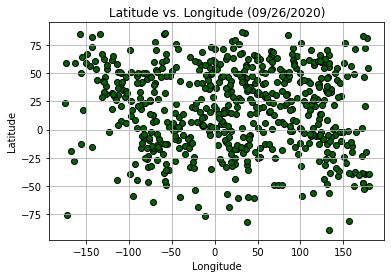

In [12]:
#See the points across the world that we randomly generated
#create the plot
plt.scatter(cleanWeather_df['Longitude'],cleanWeather_df['Latitude'],color='darkgreen',edgecolors='black')

#format axes
plt.title(f"Latitude vs. Longitude ({date})")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)

#save figure
plt.savefig(os.path.join(outputFilePath,"Latitude_vs_Longitude_DataSet.png"))

#show plot
plt.show()

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

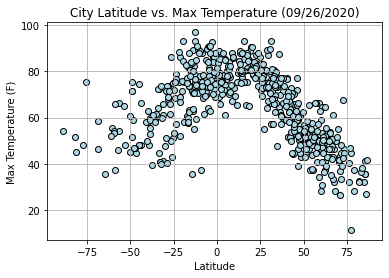

In [15]:
#create the plot
plt.scatter(cleanWeather_df['Latitude'],cleanWeather_df['Max Temp'],color='lightblue',edgecolors='black')

#format axes
plt.title(f"City Latitude vs. Max Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

#save figure
plt.savefig(os.path.join(outputFilePath,"MaxTemp_vs_Latitude.png"))

#show plot
plt.show()

In [14]:
#Explanation:
# Based on the chart we can see that closer to the equator (Latitude = 0) max temperature increases.
# Towards the poles, north and south (Latitude = 90 and -90), the max temperature is siginificantly lower.

## Latitude vs. Humidity Plot

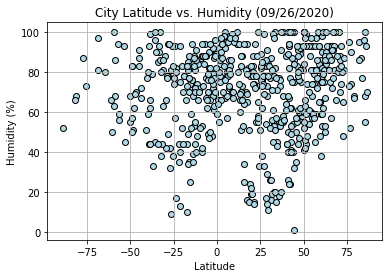

In [16]:
#create the plot
plt.scatter(cleanWeather_df['Latitude'],cleanWeather_df['Humidity'],color='lightblue',edgecolors='black')

#format axes
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

#save figure
plt.savefig(os.path.join(outputFilePath,"Humidity_vs_Latitude.png"))

#show plot
plt.show()

In [17]:
#Explanation:
# The humidity seems to have some range to get lower along latitudes of -25 and 25 ranges.
# Most locations in this dataset have humidities between 60% adn 100% when this data was taken.

## Latitude vs. Cloudiness Plot

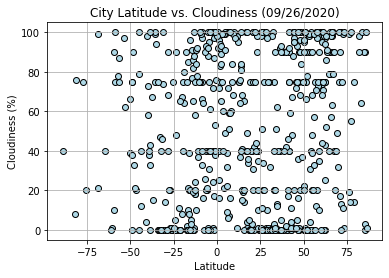

In [18]:
#create the plot
plt.scatter(cleanWeather_df['Latitude'],cleanWeather_df['Cloudiness'],color='lightblue',edgecolors='black')

#format axes
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

#save figure
plt.savefig(os.path.join(outputFilePath,"Cloudiness_vs_Latitude.png"))

#show plot
plt.show()

In [19]:
#Explanation:
# Cloudiness seems to be most consistent around 0%, 40%, ~75%, 100%.
# Areas between approximately latitudes:
#     [-37,-10],[15,67] have higher reported 0-5% clouds
#     [-20,42] have higher reported 40% clouds
#     [5,92] has a consistent line of reported 75% clouds
#     [-10,90] has a consistent line of reported 100% clouds

## Latitude vs. Wind Speed Plot

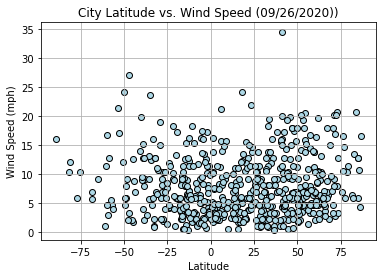

In [20]:
#create the plot
plt.scatter(cleanWeather_df['Latitude'],cleanWeather_df['Wind Speed'],color='lightblue',edgecolors='black')

#format axes
plt.title(f"City Latitude vs. Wind Speed ({date}))")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

#save figure
plt.savefig(os.path.join(outputFilePath,"WindSpeed_vs_Latitude.png"))

#show plot
plt.show()

In [21]:
#Explanation:
# Wind speed seems to stay relatively below 10 mph at most data points.
# It looks like it kicks up more between [-50,-25] and [25,50] latitudes.

## Linear Regression

In [22]:
#seperate northern hemisphere and southern hemisphere data points
northernWeather_df = cleanWeather_df.loc[cleanWeather_df["Latitude"]>=0]
southernWeather_df = cleanWeather_df.loc[cleanWeather_df["Latitude"]<=0]

In [23]:
#slope, intercept, r_value, p_value, std_err = stats.linregress(xaxis, yaxis)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

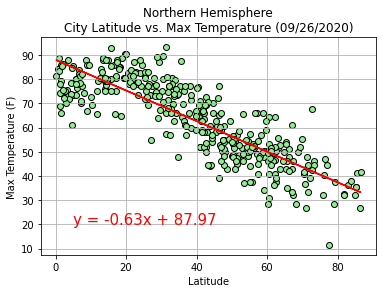

In [24]:
#linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(northernWeather_df['Latitude'], northernWeather_df['Max Temp'])
regressValues = northernWeather_df['Latitude']*slope+intercept
lineEquation = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))

#create the plot
plt.scatter(northernWeather_df['Latitude'],northernWeather_df['Max Temp'],color='lightgreen',edgecolors='black')
plt.plot(northernWeather_df['Latitude'],regressValues,"r-")

#format axes
plt.annotate(lineEquation,(5,20),fontsize=15,color="red")
plt.title(f"Northern Hemisphere\nCity Latitude vs. Max Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

#save figure
plt.savefig(os.path.join(outputFilePath,"MaxTemp_vs_Latitude_NorthernHemisphere.png"))

#show plot
plt.show()

In [25]:
#Explanation
# There is a clear trend in the northern hemisphere that closer to the equator (Latitude = 0) it is much higher max 
# temperature and closer to the north pole (Latitude= 90) is much cooler max temperatures.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

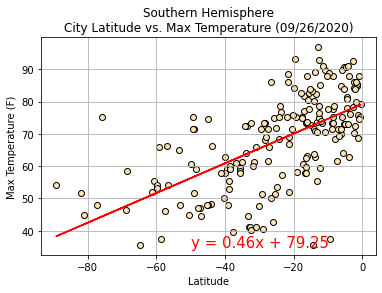

In [26]:
#linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(southernWeather_df['Latitude'], southernWeather_df['Max Temp'])
regressValues = southernWeather_df['Latitude']*slope+intercept
lineEquation = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))

#create the plot
plt.scatter(southernWeather_df['Latitude'],southernWeather_df['Max Temp'],color='moccasin',edgecolors='black')
plt.plot(southernWeather_df['Latitude'],regressValues,"r-")

#format axes
plt.annotate(lineEquation,(-50,35),fontsize=15,color="red")
plt.title(f"Southern Hemisphere\nCity Latitude vs. Max Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

#save figure
plt.savefig(os.path.join(outputFilePath,"MaxTemp_vs_Latitude_SouthernHemisphere.png"))

#show plot
plt.show()

In [27]:
#Explanation
# The same is true for the southern hemisphere. Closer to the equator (Latitude = 0) is higher max temperatures while
# closer to the south pole (Latitude = -90) is colder max temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

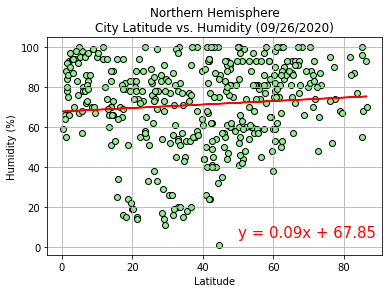

In [28]:
#linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(northernWeather_df['Latitude'], northernWeather_df['Humidity'])
regressValues = northernWeather_df['Latitude']*slope+intercept
lineEquation = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))

#create the plot
plt.scatter(northernWeather_df['Latitude'],northernWeather_df['Humidity'],color='lightgreen',edgecolors='black')
plt.plot(northernWeather_df['Latitude'],regressValues,"r-")

#format axes
plt.annotate(lineEquation,(50,5),fontsize=15,color="red")
plt.title(f"Northern Hemisphere\nCity Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

#save figure
plt.savefig(os.path.join(outputFilePath,"Humidity_vs_Latitude_NorthernHemisphere.png"))

#show plot
plt.show()

In [29]:
#Explanation
# In the northern hemisphere it seems that there is a cosistent trend of humidity being >75% within this dataset and
# ever so slightly increasing towards the pole.
# Between about latitude [20,60] there is more chance of possible lower humidity than right at the equator or pole.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

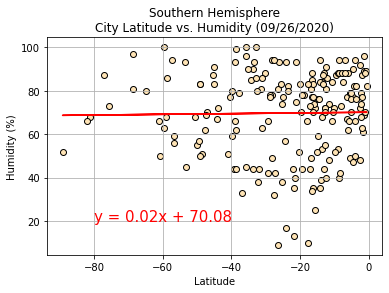

In [30]:
#linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(southernWeather_df['Latitude'], southernWeather_df['Humidity'])
regressValues = southernWeather_df['Latitude']*slope+intercept
lineEquation = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))

#create the plot
plt.scatter(southernWeather_df['Latitude'],southernWeather_df['Humidity'],color='moccasin',edgecolors='black')
plt.plot(southernWeather_df['Latitude'],regressValues,"r-")

#format axes
plt.annotate(lineEquation,(-80,20),fontsize=15,color="red")
plt.title(f"Southern Hemisphere\nCity Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

#save figure
plt.savefig(os.path.join(outputFilePath,"Humidity_vs_Latitude_SouthernHemisphere.png"))

#show plot
plt.show()

In [31]:
#Explanation
# In the southern hemisphere it seems that there is a cosistent trend of humidity being >75% within this dataset and
# ever so slightly increasing towards the poles.
# Between about latitude [-20,-60] there is more chance of possible lower humidity than right at the equator or pole.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

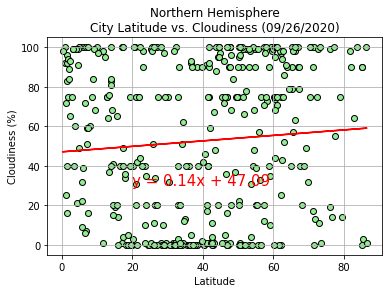

In [32]:
#linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(northernWeather_df['Latitude'], northernWeather_df['Cloudiness'])
regressValues = northernWeather_df['Latitude']*slope+intercept
lineEquation = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))

#create the plot
plt.scatter(northernWeather_df['Latitude'],northernWeather_df['Cloudiness'],color='lightgreen',edgecolors='black')
plt.plot(northernWeather_df['Latitude'],regressValues,"r-")

#format axes
plt.annotate(lineEquation,(20,30),fontsize=15,color="red")
plt.title(f"Northern Hemisphere\nCity Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

#save figure
plt.savefig(os.path.join(outputFilePath,"Cloudiness_vs_Latitude_NorthernHemisphere.png"))

#show plot
plt.show()

In [33]:
#Explanation
# Based on the dataset there is not much trend of cloudiness in the northern hemisphere.
# It slightly increases the farther from the equator.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

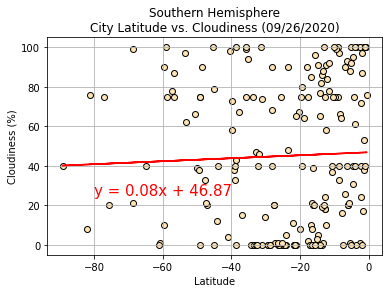

In [34]:
#linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(southernWeather_df['Latitude'], southernWeather_df['Cloudiness'])
regressValues = southernWeather_df['Latitude']*slope+intercept
lineEquation = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))

#create the plot
plt.scatter(southernWeather_df['Latitude'],southernWeather_df['Cloudiness'],color='moccasin',edgecolors='black')
plt.plot(southernWeather_df['Latitude'],regressValues,"r-")

#format axes
plt.annotate(lineEquation,(-80,25),fontsize=15,color="red")
plt.title(f"Southern Hemisphere\nCity Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

#save figure
plt.savefig(os.path.join(outputFilePath,"Cloudiness_vs_Latitude_SouthernHemisphere.png"))

#show plot
plt.show()

In [35]:
#Explanation
# Based on the dataset there is not much trend of cloudiness in the southern hemisphere.
# It slightly increases the farther from the equator.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

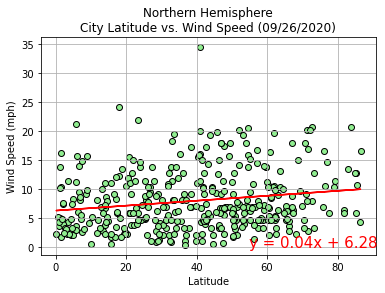

In [36]:
#linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(northernWeather_df['Latitude'], northernWeather_df['Wind Speed'])
regressValues = northernWeather_df['Latitude']*slope+intercept
lineEquation = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))

#create the plot
plt.scatter(northernWeather_df['Latitude'],northernWeather_df['Wind Speed'],color='lightgreen',edgecolors='black')
plt.plot(northernWeather_df['Latitude'],regressValues,"r-")

#format axes
plt.annotate(lineEquation,(55,0),fontsize=15,color="red")
plt.title(f"Northern Hemisphere\nCity Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

#save figure
plt.savefig(os.path.join(outputFilePath,"WindSpeed_vs_Latitude_NorthernHemisphere.png"))

#show plot
plt.show()

In [37]:
#Explanation
# Wind speeds also don't have much of a trend in the northern hemisphere.
# There is a slight increase farther from the equator.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

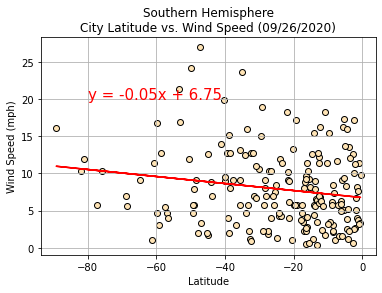

In [38]:
#linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(southernWeather_df['Latitude'], southernWeather_df['Wind Speed'])
regressValues = southernWeather_df['Latitude']*slope+intercept
lineEquation = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))

#create the plot
plt.scatter(southernWeather_df['Latitude'],southernWeather_df['Wind Speed'],color='moccasin',edgecolors='black')
plt.plot(southernWeather_df['Latitude'],regressValues,"r-")

#format axes
plt.annotate(lineEquation,(-80,20),fontsize=15,color="red")
plt.title(f"Southern Hemisphere\nCity Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

#save figure
plt.savefig(os.path.join(outputFilePath,"WindSpeed_vs_Latitude_SouthernHemisphere.png"))

#show plot
plt.show()

In [39]:
#Explanation
# Wind speeds also don't have much of a trend in the southern hemisphere, though slightly more than the north.
# There is a slight increase farther from the equator.